# Display of Rich Output

In Python, objects can declare their textual representation using the `__repr__` method.  

In [1]:
class Ball(object):
    pass

b = Ball()
b.__repr__()

'<__main__.Ball object at 0x7fb364552a90>'

In [2]:
print(b)

Overriding the `__repr__` method:

In [3]:
class Ball(object):
    def __repr__(self):
        return 'TEST'

b = Ball()

In [4]:
print(b)

TEST


IPython expands on this idea and allows objects to declare other, rich representations including:

* HTML
* JSON
* PNG
* JPEG
* SVG
* LaTeX

A single object can declare **some or all** of these representations; all of them are handled by IPython's *display system*. .

## Basic display imports

The `display` function is a general purpose tool for displaying different representations of objects. Think of it as `print` for these rich representations.

In [5]:
from IPython.display import display

A few points:

* Calling `display` on an object will send **all** possible representations to the Notebook.
* These representations are stored in the Notebook document.
* In general the Notebook will use the richest available representation.

If you want to display a particular representation, there are specific functions for that:

In [6]:
from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)

## Images

To work with images (JPEG, PNG) use the `Image` class.

In [7]:
from IPython.display import Image

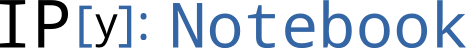

In [8]:
i = Image(filename='./ipython-image.png')
display(i)

Returning an `Image` object from an expression will automatically display it:

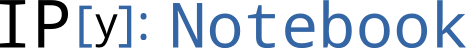

In [9]:
i

An image can also be displayed from raw data or a URL.

In [10]:
Image(url='http://python.org/images/python-logo.gif')

## HTML

Python objects can declare HTML representations that will be displayed in the Notebook. If you have some HTML you want to display, simply use the `HTML` class.

In [11]:
from IPython.display import HTML

In [12]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [13]:
h = HTML(s)

In [14]:
display(h)

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


You can also use the `%%html` cell magic to accomplish the same thing.

In [ ]:
%%html
<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>

In [15]:
%%html
<style>
#notebook {
    background-color: skyblue;
    font-family: times new roman;
}
</style>

You can remove the abvove styling by using "Cell"$\rightarrow$"Current Output"$\rightarrow$"Clear" with that cell selected.

## JavaScript

The Notebook also enables objects to declare a JavaScript representation. At first, this may seem odd as  output is inherently visual and JavaScript is a programming language. However, this opens the door for rich output that leverages the full power of JavaScript and associated libraries such as [d3.js](http://d3js.org) for output.

In [ ]:
from IPython.display import Javascript

Pass a string of JavaScript source code to the `JavaScript` object and then display it.

In [ ]:
js = Javascript('alert("hi")');

In [ ]:
display(js)

The same thing can be accomplished using the `%%javascript` cell magic:

In [ ]:
%%javascript

alert("hi");

Here is a more complicated example that loads `d3.js` from a CDN, uses the `%%html` magic to load CSS styles onto the page and then runs ones of the `d3.js` examples.

In [ ]:
Javascript(
    """$.getScript('https://cdnjs.cloudflare.com/ajax/libs/d3/3.2.2/d3.v3.min.js')"""
)

In [ ]:
%%html
<style type="text/css">

circle {
  fill: rgb(31, 119, 180);
  fill-opacity: .25;
  stroke: rgb(31, 119, 180);
  stroke-width: 1px;
}

.leaf circle {
  fill: #ff7f0e;
  fill-opacity: 1;
}

text {
  font: 10px sans-serif;
}

</style>

In [ ]:
%%javascript

// element is the jQuery element we will append to
var e = element.get(0);
    
var diameter = 600,
    format = d3.format(",d");

var pack = d3.layout.pack()
    .size([diameter - 4, diameter - 4])
    .value(function(d) { return d.size; });

var svg = d3.select(e).append("svg")
    .attr("width", diameter)
    .attr("height", diameter)
  .append("g")
    .attr("transform", "translate(2,2)");

d3.json("./flare.json", function(error, root) {
  var node = svg.datum(root).selectAll(".node")
      .data(pack.nodes)
    .enter().append("g")
      .attr("class", function(d) { return d.children ? "node" : "leaf node"; })
      .attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });

  node.append("title")
      .text(function(d) { return d.name + (d.children ? "" : ": " + format(d.size)); });

  node.append("circle")
      .attr("r", function(d) { return d.r; });

  node.filter(function(d) { return !d.children; }).append("text")
      .attr("dy", ".3em")
      .style("text-anchor", "middle")
      .text(function(d) { return d.name.substring(0, d.r / 3); });
});

d3.select(self.frameElement).style("height", diameter + "px");

## Audio

IPython makes it easy to work with sounds interactively. The `Audio` display class allows you to create an audio control that is embedded in the Notebook. The interface is analogous to the interface of the `Image` display class. All audio formats supported by the browser can be used. Note that no single format is presently supported in all browsers.

In [ ]:
from IPython.display import Audio
Audio("./scrubjay.mp3")

A NumPy array can be converted to audio. The `Audio` class normalizes and encodes the data and embeds the resulting audio in the Notebook.

For instance, when two sine waves with almost the same frequency are superimposed a phenomena known as [beats](https://en.wikipedia.org/wiki/Beat_%28acoustics%29) occur:

In [ ]:
import numpy as np
max_time = 3
f1 = 120.0
f2 = 124.0
rate = 8000.0
L = 3
times = np.linspace(0,L,rate*L)
signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)

Audio(data=signal, rate=rate)

## Video

More exotic objects can also be displayed, as long as their representation supports the IPython display protocol.  For example, videos hosted externally on YouTube are easy to load:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('sjfsUzECqK0')

## External sites

You can even embed an entire page from another site in an iframe; for example this is IPython's home page:

In [ ]:
from IPython.display import IFrame
IFrame('https://ipython.org', width='100%', height=350)

## Links to local files

IPython provides builtin display classes for generating links to local files. Create a link to a single file using the `FileLink` object:

In [ ]:
from IPython.display import FileLink, FileLinks
FileLink('../Visualization/Matplotlib.ipynb')

Alternatively, to generate links to all of the files in a directory, use the `FileLinks` object, passing `'.'` to indicate that we want links generated for the current working directory. Note that if there were other directories under the current directory, `FileLinks` would work in a recursive manner creating links to files in all sub-directories as well.

In [ ]:
FileLinks('./')

## Rich output and nbviewer

Much of the power of the Notebook is that it enables users to share notebooks with each other using http://nbviewer.ipython.org, without installing IPython locally. As of IPython 2.0, notebooks rendered on nbviewer will display all output, including HTML and JavaScript. Furthermore, to provide a consistent JavaScript environment on the live Notebook and nbviewer, the following JavaScript libraries are loaded onto the nbviewer page, *before* the notebook and its output is displayed:

* [jQuery](http://jquery.com/)
* [RequireJS](http://requirejs.org/)

Libraries such as [mpld3](http://mpld3.github.io/) use these capabilities to generate interactive visualizations that work on nbviewer.